## Needy Paws Adoption Exploratory Data Analysis

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
%matplotlib inline

dogs = pd.read_excel('/Users/admin/Desktop/CoderGirl/gringotts-mf/NeedyPawsMaster.xlsx', sep=",")
dogs.head()

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30,N,Labrador,M,Young,Yellow,Medium
1,Abby,11,N,Dachshund,F,Adult,Tan,Small
2,Abby,31,N,Unknown,F,Adult,Brindle,Medium
3,Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,Abby,83,N,Chihuahua,F,Adult,Tan,Small


In [2]:
dogs.shape

(3088, 8)

In [3]:
dogs.columns

Index(['Name of Dog', 'Days in Rescue', 'Heartworm Positive', 'Breed', 'Sex',
       'Age Group When Rescued', 'Color', 'Size'],
      dtype='object')

In [4]:
dogs.dtypes

Name of Dog               object
Days in Rescue             int64
Heartworm Positive        object
Breed                     object
Sex                       object
Age Group When Rescued    object
Color                     object
Size                      object
dtype: object

In [5]:
dogs['Color'].value_counts()

Multicolor    1810
Black          364
Tan            232
Brown          194
White          173
Brindle        125
Yellow          71
Red             59
Gray            26
Blue            21
Merle            8
Name: Color, dtype: int64

In [6]:
dogs['Sex'].value_counts()

M    1549
F    1539
Name: Sex, dtype: int64

In [7]:
dogs['Breed'].value_counts().head(10)

Mixed Breed (Non-Pitbull)    398
Pitbull                      390
Labrador                     308
Chihuahua                    242
Mixed Breed (Pitbull)        218
Beagle                       140
MIxed Breed (Non-Pitbull)    111
Terrier                      106
Shepherd                     100
Boxer                         80
Name: Breed, dtype: int64

In [8]:
df = dogs.groupby(['Size']).mean()
print(df)

         Days in Rescue
Size                   
Large         51.838006
Medium        52.218082
Small         37.161008
X Large       29.600000


In [9]:
df = dogs.groupby(['Sex']).mean()
print(df)

     Days in Rescue
Sex                
F         49.447044
M         45.923822


In [10]:
df = dogs.groupby(['Color']).mean()
print(df)

            Days in Rescue
Color                     
Black            49.788462
Blue             72.619048
Brindle          49.408000
Brown            46.979381
Gray             31.153846
Merle            52.000000
Multicolor       46.606630
Red              44.169492
Tan              48.370690
White            60.023121
Yellow           32.436620


In [11]:
dogs.describe(include = "all")

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
count,3088,3088.000000,3088,3088,3088,3033,3083,3069
unique,2167,NaN,3,103,2,5,11,4
top,Molly,NaN,N,Mixed Breed (Non-Pitbull),M,Puppy,Multicolor,Medium
freq,9,NaN,2996,398,1549,1313,1810,1825
mean,NaN,47.679728,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,62.371584,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN


[(0, 875.4515239679351)]

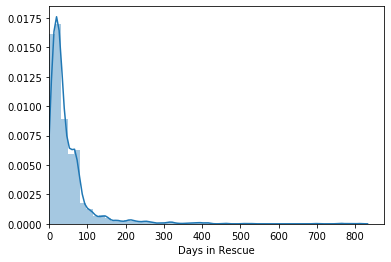

In [12]:
plt.figure()
plt.tight_layout()
sns.distplot(dogs['Days in Rescue']).set(xlim=0)

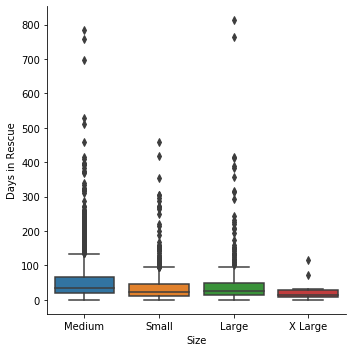

In [13]:
sns.catplot(x="Size", y="Days in Rescue", kind="box", data=dogs);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1701f590>]],
      dtype=object)

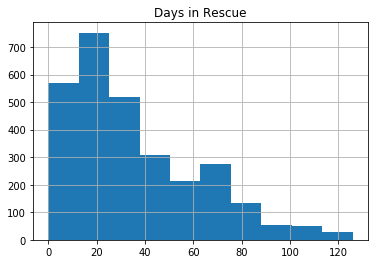

In [14]:
#Identify outliers
Q1 = dogs.quantile(0.25)
Q3 = dogs.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(dogs['Days in Rescue'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
dogs = dogs.drop(['Days in Rescue'],axis=1)
dogs = dogs.join(df1)
dogs.hist()

In [15]:
#Drop outlier rows
dogs = dogs.dropna(axis=0, subset=['Days in Rescue'])
dogs.shape

(2898, 8)

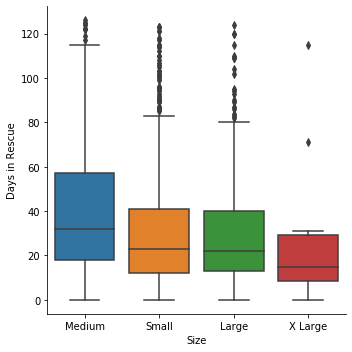

In [16]:
sns.catplot(x="Size", y="Days in Rescue", kind="box", data=dogs);

In [17]:
df = dogs.groupby(['Size']).mean()
print(df)

         Days in Rescue
Size                   
Large         30.547945
Medium        38.507665
Small         30.603859
X Large       29.600000


In [18]:
df = dogs.groupby(['Sex']).mean()
print(df)

     Days in Rescue
Sex                
F         34.919637
M         35.848671


[(0, 151.17854238311787)]

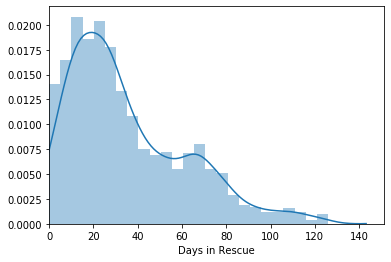

In [19]:
plt.figure()
plt.tight_layout()
sns.distplot(dogs['Days in Rescue']).set(xlim=0)

In [20]:
# One-hot encoding
#dogs['Breed2'] = dogs['Breed']
#dogs = pd.get_dummies(dogs, columns=['Breed2'], prefix=['Breed'])

#dogs['HW2'] = dogs['Heartworm Positive']
#dogs = pd.get_dummies(dogs, columns=['HW2'], prefix=['Heartworm Positive'])

#dogs['Sex2'] = dogs['Sex']
#dogs = pd.get_dummies(dogs, columns=['Sex2'], prefix=['Sex'])

#dogs['Age Group When Rescued 2'] = dogs['Age Group When Rescued']
#dogs = pd.get_dummies(dogs, columns=['Age Group When Rescued 2'], prefix=['Age Group When Rescued'])

#dogs['Size2'] = dogs['Size']
#dogs = pd.get_dummies(dogs, columns=['Size2'], prefix=['Size'])

